# Linear Model Selection and Regularization

***Prediction Accuracy***: <br>
* If `n`, the number of observations, is much larger than `p`, the number of variables—then the least squares estimates tend to also have low variance, and hence will perform well on test observations.
* If `n` is not much larger than `p`, then there can be a lot of variability in the least squares fit, resulting in overfitting and consequently poor predictions on future observations not used in model training.
* If `p > n`, then there is no longer a unique least squares coefficient estimate: there are infinitely many solutions.
* By *constraining* or *shrinking* the estimated coefficients, we can often substantially reduce the variance at the cost of a negligible increase in bias.
* This can lead to substantial improvements in the accuracy with which we can predict the response for observations not used in model training.

***Model Interpretability***:<br>
* It is often the case that some or many of the variables used in a multiple regression model are in fact not associated with the response.
* Including such irrelevant variables leads to unnecessary complexity in the resulting model.
* By removing these variables—that is, by setting the corresponding coefficient estimates to zero—we can obtain a model that is more easily interpreted.
* *Feature selection* or *variable selection* - that is, for excluding irrelevant variables from a multiple regression model.

***Subset Selection***:<br>
* Identifying a subset of the `p` predictors that we believe to be related to the response.
* We then fit a model using least squares on the reduced set of variables.

***Shrinkage***:<br>
* This approach involves fitting a model involving all `p` predictors.
* The estimated coefficients are shrunken towards zero relative to the least squares estimates.
* This shrinkage (also known as *regularization*) has the effect of reducing variance.

***Dimension Reduction***:
* This approach involves projecting the p predictors into an M-dimensional subspace, where `M <p`.
* This is achieved by computing M different linear combinations, or projections, of the variables.
* Then these M projections are used as predictors to fit a linear regression model by least squares.

## Subset Selection
* Some methods for selecting subsets of predictors.
### Best Subset Selection
* We fit a separate least squares regression best subset for each possible combination of the p predictors.
* We fit all `p` models that contain exactly one predictor : $$ \binom{n}{r}=\frac{p \cdot (p-1)}{2}$$ models that contain exactly two predictors, and so forth.
* We then look at all of the resulting models, with the goal of identifying the one that is best.
* The problem of selecting the best model from among the 2^p possibilities considered by best subset selection is not trivial.
* Step 2 (in the algorithm mentioned below) identifies the best model in order to reduce the problem from one of `2^p` possible models to one of `p + 1` possible models.
* The problem is that a low RSS or a high R² indicates a model with a *low training error*, whereas we wish to choose a model that has a *low test error*.
* So,in Step 3, we use the error on a validation set, Cp, BIC, or adjusted R^2 in order to select among M0, . . . ,Mp.
* If cross-validation is used to select the best model, then Step 2 is repeated on each training fold, and the validation errors are averaged to select the best value of `k`.
* In the case of logistic regression, instead of ordering models by RSS in Step 2 of Algorithm, we instead use the ***deviance***.
* The *deviance* is a measure - negative two times the maximized log-likelihood; the smaller the deviance, the better the fit.
* It becomes computationally infeasible for values of p greater than 40 even with extremely fast modern computers.
* computational shortcuts—so called *branch-and-bound techniques* also have their limitations as `p` gets large.
* They also only work for least squares linear regression.
#### Algorithm for Best Subset Selection
* M0 denote the null model, which contains no predictors - this model simply predicts the sample mean for each observation.
* For k=1,2,3,...p fit all the $$ \binom{p}{k}$$ models that contain exactly `k` predictors.
* Pick the best among the $$ \binom{p}{k}$$ models and call it Mk. Best means having the smallest RSS, or equivalently largest R^2.
* Select a single best model from among M0, . . . ,Mp using using the prediction error on a validation set, Cp (AIC), BIC, or adjusted R2. Or use the cross-validation method.

### Stepwise Selection
* The larger the search space, the higher the chance of finding models that look good on the training data, even though they might not have any predictive power on future data.
* Thus an enormous search space can lead to overfitting and high variance of the coefficient estimates.
* A computationally efficient alternative to best subset selection.
### Forward Stepwise Selection
* Forward stepwise selection begins with a model containing no predictors, and then adds predictors to the model, one-at-a-time, until all of the predictors are in the model.
* At each step the variable that gives the greatest additional improvement to the fit is added to the model.
* Forward stepwise selection involves fitting one null model, along with p − k models in kth iteration.
* In forward stepwise selection approach, it is not guaranteed to find the best possible model out of all 2p models containing subsets of the p predictors.
* Forward stepwise selection can be applied even in the high-dimensional setting where n < p;
#### Algorithm for Forward Stepwise Selection
* M0 denote the null model, which contains no predictors.
* For k=0,..,p-1, Consider all p − k models that augment the predictors in Mk with one additional predictor and choose the best among these p − k models, and call it Mk+1 (Best means having the smallest RSS, or equivalently largest R^2).
* Select a single best model from among M0, . . . ,Mp using using the prediction error on a validation set, Cp (AIC), BIC, or adjusted R2. Or use the cross-validation method.
### Backward Stepwise Selection
* It begins with the full least squares model containing all p predictors, and then iteratively removes the least useful predictor,one-at-a-time.
* Like forward approach, approach searches through only 1+p(p+1)/2 models, and so can be applied in settings where p is too large to apply best subset selection.
* Backward stepwise selection is also not guaranteed to yield the best model containing a subset of the p predictors.
* Backward selection requires that the number of samples n is larger than the number of variables p; while forward stepwise can be used even when n < p, and so is the only viable subset method when p is very large.
#### Algorithm for Backward Stepwise Selection
* M0 denote the null model, which contains no predictors.
* For k=p,p-1,..,1, Consider all k models that contain all but one of the predictors in Mk with for a total of k − 1 predictors and choose the best among these k models, and call it Mk+1 (Best means having the smallest RSS, or equivalently largest R^2).
* Select a single best model from among M0, . . . ,Mp using using the prediction error on a validation set, Cp (AIC), BIC, or adjusted R2. Or use the cross-validation method.
### Hybrid Approaches
* The best subset, forward stepwise, and backward stepwise selection approaches generally give similar but not identical models.
* The variables are added to the model sequentially (forward stepwise selection approach) and after adding each new variable, the method may also remove any variables that no longer provide an improvement in the model fit (backward stepwise selection approach).
* This more closely mimic best subset selection while retaining the computational advantages of forward / backward stepwise selection approaches.

## Choosing the Optimal Model
* In order to select the best model with respect to test error, we need to estimate this test error. There are two common approaches:
  * We can *indirectly* estimate test error by making an ***adjustment*** to the training error to account for the bias due to overfitting.
  * We can *directly* estimate the test error, using either a validation set approach or a cross-validation approach.
### Cp, AIC, BIC, and Adjusted R²
* The training set MSE is generally an underestimate of the test (W.K.T, `MSE (MSE=RSS/n)`).
* The *training error* will decrease as more variables are included in the model, but the *test error* may not.
* There are number of techniques for adjusting the training error for the model size are available. These approaches can be used to select among a set of models with different numbers of variables.
  * Cp.
  * Akaike information criterion (AIC).
  * Bayesian information criterion (BIC).
  * Adjusted R-square (R²).
#### Cp
Let for a fitted least squares model, <br>`d` → no.of. predictors,<br> `^σ²` be the estimate of the variance of the error `ε` associated with each
response measurement  ***P.S.*** Typically `^σ²` is estimated using the full model containing all predictors,<br> then, the Cp estimate of test MSE is computed using the equation : $$C_{p}= \frac{1}{n} (RSS+2d\hat{\sigma}^2)$$. <br>
**Notes**:
* The term `2d^σ²` adds a penalty to the training RSS - to <u>adjust<\u> for the fact that the training error tends to underestimate the test error.
* As `d` ↑, it tends to ↑ the penalty term, for the adjust for the ↓ in RSS; and it can be proved that `^σ²` is an unbiased estimate of `σ²`.
* Therefore, Cp is an unbiased estimate of test MSE.
* Cp statistic tends to take on a small value for models with a low test error - leading us to choose the best model with the lowest Cp value.
#### Mallow's Cp (Cp')
Calculated by the eqn: $$ C_{p}'= \frac{RSS}{\hat{\sigma}^2}+2d-n$$.
Relationship between Cp and Cp' is given as $$ C_{p}= \frac{1}{n}\cdot \hat{\sigma}^2(C_{p}+n)$$
Also, **the model with small Cp will also have small Cp'**.
#### Akaike information criterion (AIC)
* AIC is defined for a large class of models fit by maximum likelihood.
* There are two formulas for AIC for least squares regression.
* When `^σ²` is known (that can be calculated using the full model containing all predictors), then $$ AIC = \frac{1}{n}(RSS+2d\hat{\sigma}^2)$$.
* When `^σ²` is unknown or we do not want to explicitly estimate it; then $$ AIC = 2k-2ln(\hat{L})$$ . Log likelihood is defined as $$ \mathcal{L}(\mu_1, \sigma_1, \mu_2, \sigma_2) = 
\prod_{i=1}^{n_1} \frac{1}{\sqrt{2\pi\sigma_1}} \exp\left(-\frac{(x_i - \mu_1)^2}{2\sigma_1^2}\right) \cdot 
\prod_{i=n_1+1}^{n_1+n_2} \frac{1}{\sqrt{2\pi\sigma_2}} \exp\left(-\frac{(x_i - \mu_2)^2}{2\sigma_2^2}\right)$$.
#### Bayesian information criterion (BIC)
* It is derived from a Bayesian point of view, but ends up looking similar to Cp (and AIC) as well.
Let `n`number of observations <br> `d` → no.of. predictors,<br> `^σ²` be the estimate of the variance of the error `ε` associated with each
response measurement  ***P.S.*** Typically `^σ²` is estimated using the full model containing all predictors,<br> then, $$BIC=\frac{1}{n}(RSS+log(n)d \hat{\sigma}^2)$$
* the BIC will tend to take on a small value for a model with a low test error,we select the model that has the lowest BIC value.
#### Adjusted R²
* The adjusted R² statistic is another popular approach for selecting among a set of models that contain different numbers of variables.
* W.K.T the usual R² is defined as 1 − RSS/TSS, where TSS is the total sum of squares for the response i.e., ∑(y<sub>i</sub> - ȳ)².
* As RSS ↓ as more variables are added to the model, then R² always ↑ .
* Adjusted R² is calculated by the eqn : $$ Adjusted \space R^2 = 1- \frac{\frac{RSS}{(n-d-1)}}{\frac{TSS}{(n-1)}} $$, where TSS = ∑(y<sub>i</sub> - ȳ)².
* Unlike Cp, AIC, and BIC, a large value of adjusted R² indicates a model with a small test error.
* The intuition behind the adjusted R² is that once all of the correct variables have been included in the model, adding additional noise variables will lead to only a very small decrease in RSS.
* Adding noise variables leads to an increase in `d`, such variables will lead to an increase in the component `RSS/(n-d-1)`, consequently a decrease in the adjusted R².
* Unlike the R² statistic, the adjusted R² statistic pays a price for the inclusion of unnecessary variables in the model.
### Validation and Cross-Validation
* We can directly estimate the test error using the validation set and cross-validation methods - compute the validation set error or the cross-validation error for each model under consideration and then select the model for which the resulting estimated test error is smallest.
* Unlike Cp, AIC, BIC, Adjusted R² approaches - it provides a direct estimate of the test error, and makes fewer assumptions about the true underlying model.
* This mode of approach can be even used in the situations like: where it is hard to pinpoint the model degrees of freedom (e.g. the number of predictors in the model) or hard to estimate the error variance σ².
* ***P.S.*** While in using Cross Validation approach, sequence of models 𝔐ₖ in algorithms (for best subset, forward and backward stepwise selection approaches) is determined separately for each training fold, and the validation errors are averaged over all folds for each model size k - the best subset of size k, can differ across the folds.
* Nowadays with fast computers, the computations required to perform cross-validation are hardly ever an issue.
* Thus, crossvalidation is a very attractive approach for selecting from among a number of models under consideration.
#### One-standard-error rule
* We first calculate the standard error of the estimated test MSE for each model size, and then select the smallest model for which the estimated test error is within *one standard error* of the lowest point on the curve.
* *Rationale* - if a set of models appear to be more or less equally good, then we might as well choose the simplest model - the model with the smallest number of predictors.

## Shrinkage Methods
* As an alternative, we can fit a model containing all p predictors using a technique that constrains or regularizes the coefficient estimates, or equivalently, that shrinks the coefficient estimates towards zero.
* It turns out that shrinking the coefficient estimates can significantly reduce their variance.
* two best-known techniques for shrinking regression coefficients: *ridge regression* and the *lasso*.
### Ridge Regression
* Ridge regression is very similar to least squares, except that the coefficients are estimated by minimizing RSS with a shrinkage penalty - the ridge regression coefficient estimates β̂R given by $$\hat{\beta}^R = RSS + \lambda \sum_{j=1}^{p}\beta_{j}^{2}$$ where, $$ RSS = \sum_{i=1}^{n} \left (y_{i}- \beta_{0} - \sum_{j=1}^{p} \beta_{j} \cdot x_{ij} \right)^2 $$.
* The `λ` is called *tuning parameter* to be determined seperately and the term `λ∑ⱼβⱼ²` is called *shrinkage penalty*
* The shrinkage penalty will tend to smaller when β₁,...,βₚ are close to zero, it has the effect of shrinking the estimates of βⱼ towards zero.
* The tuning parameter λ serves to control the relative impact of these two terms on the regression coefficient estimates - when `λ → 0` , penalty term has no effect, ridge regression will produce the least squares estimates ; when `λ → ∞`, shrinkage penalty grows, the ridge regression coefficient estimates will approach zero.
* Ridge regression will produce a different set of coefficient estimates β̂Rλ for each  value of λ - selecting a good value for λ is critical.
* ***P.S.*** The shrinkage penalty is applied to β₁,...,βₚ but not to the intercept β₀ i.e., we want to shrink the estimated association of each variable with the response. If we assume that the variables have been centered to have mean zero before ridge regression is performed, then the estimated intercept will take the form $$ \hat{\beta_{0}} = \bar{y} = \sum_{i=1}^{n} \left ( y_{i}/n \right )$$.
* When λ is extremely large, then all of the ridge coefficient estimates are basically zero; this corresponds to the *null model* that contains no predictors.
* The notation ∥β∥₂ is called 𝓁₂ norm (It measures the distance of β from zero) and it is calculated as $$ ∥β∥₂ = \sqrt {\sum_{j=1}^{p} \beta_{j}^{2}}$$
* As λ↑, 𝓁₂ norm of ridge regression coefficient estimates `^β̂R` will always ↓
* The ridge regression coefficient estimates can change substantially when multiplying a given predictor by a constant
* Let `Xj` be the column in the dataset of `jth` predictor, and `c` be a constant, for a `λ` as tuning factor, then the term `Xj^βᵣ` will depend not only on the value of λ but also on the scaling of the jth predictor, and to be precise: the value of `Xj^βᵣ`may even depend on the scaling of the other predictors! So it is best to apply ridge regression after standardizing the predictors, using the formula , so that they are all on the same scale.:  $$ \tilde{x}_{ij} = \frac{x_{ij}}{\sqrt{ \frac{1}{n} \cdot \sum_{i=1}^{n}(x_{ij}-\bar{x})^2}}$$
* The denominator is the estimated standard deviation of the jth predictor and hence all of the standardized predictors will have a standard deviation of 1 , and as a result the final fit will not depend on the scale on which the predictors are measured.
#### Advantages of Ridge Regression Over Least Squares
* Rooted in the bias-variance trade-off - As λ↑ the flexibility of the ridge regression fit ↓ leading to variance ↓ but bias ↑
* In general, in situations where the relationship between the response and the predictors is close to linear, the least squares estimates will have low bias but may have high variance.
* When the number of variables p is almost as large as the number of observations n, least squares estimates will be extremely variable , and if p>n, least squares estimates do not even have a unique solution. Hence, ridge regression works best in situations where the least squares estimates have high variance.
* Ridge regression also has substantial computational advantages over best subset selection and for any fixed value of λ, ridge regression only fits a single model, and the model-fitting procedure can be performed quite quickly.
#### Disdvantages of Ridge Regression
* One disadvantage of Ridge Regression is that it will include all p predictors in the final model; and that unless λ = ∞, it will not shrink any of coefficients towards zero. It may not be a problem for prediction accuracy but can create a challenge in model interpretation when the number of variables p is quite large!
### Lasso
* Relatively recent alternative to ridge regression to overcome the disadvantages of ridge regression approach.
* The lasso coefficients `^βλᴸ` minimize the quantity RSS: $$\hat{\beta}_{\lambda}^L = RSS + \lambda \sum_{j=1}^{p}|\beta_{j}|$$ where, $$ RSS = \sum_{i=1}^{n} \left (y_{i}- \beta_{0} - \sum_{j=1}^{p} \beta_{j} \cdot x_{ij} \right)^2 $$.
* The only difference is that the βj² is replaced by |βj| which is known as *lasso penalty* - in statistics terms, lasso uses 𝓁₁ norm (as against 𝓁₂ norm in ridge regression approach). The 𝓁₁ norm of a coefficient vector 𝛃 is given by `∥β∥₁= ∑|βj|`
* In the case of the lasso, the %1 penalty has the effect of forcing some of the coefficient estimates to be exactly equal to zero when the tuning parameter λ is sufficiently large.
* The lasso performs *variable selection* (like best subset selection) and as a result, models generated from the lasso are generally much easier to interpret than those produced by ridge regression.
* The lasso yields *sparse models* i.e., models that involve only a subset of the variables.
* Similar to ridge regression, selecting a good value for λ is critical for lasso.
  $$ minimize  \space \beta \space \left \{\sum_{i=1}^{n} \left (y_{i}- \beta_{0} - \sum_{j=1}^{p} \beta_{j} \cdot x_{ij} \right)^2 \right \} \space subject \space to \space \sum_{j=1}^{p} \beta_{j}^2 \leq s $$. and $$ minimize  \space \beta \space \left \{\sum_{i=1}^{n} \left (y_{i}- \beta_{0} - \sum_{j=1}^{p} \beta_{j} \cdot x_{ij} \right)^2 \right \} \space subject \space to \space \sum_{j=1}^{p} |\beta_{j}| \leq s $$.
* When p = 2, the lasso coefficient estimates have the smallest RSS out of all points that lie within the **diamond** defined by `|β₁|+|β₂| ≤ s`, while the ridge regression estimates have the smallest RSS out of all points that lie within the **circle** defined by `β₁²+β₂² ≤ s`.
* When we perform the lasso we are trying to find the set of coefficient estimates that lead to the smallest RSS, subject to the constraint that there is a budget `s` for how large `∑ᵖⱼ₌₁|βⱼ|` can be.
* When s is extremely large, then this budget is not very restrictive, and so the coefficient estimates can be large, if s is large enough that the least squares solution falls within the budget then above eqn will simply yield the least squares solution.
* If s is small, then `∑ᵖⱼ₌₁|βⱼ|` must be small in order to avoid violating the budget.
* Similarly, when we perform ridge regression, we seek a set of coefficient estimates such that the RSS is as small as possible, subject to the requirement that `∑ᵖⱼ₌₁βⱼ²` not exceed the budget s.
#### close connection between the lasso, ridge regression, and best subset selection
$$ minimize  \space \beta \space \left \{\sum_{i=1}^{n} \left (y_{i}- \beta_{0} - \sum_{j=1}^{p} \beta_{j} \cdot x_{ij} \right)^2 \right \} \space subject \space to \space \sum_{j=1}^{p} I(\beta_{j} \neq 0) \leq s $$.
Here, `I (βⱼ≠0)` is an indicator variable and takes on a value 1 if `βⱼ≠0` or 0 otherwise. But when `p` is very large, it becomes **computationally infeasible** since it requires considering all `pCs` models containing `s` predictors. Therefore, we can interpret ridge regression and the lasso as computationally feasible alternatives to best subset selection . The lasso is much more closely related to best subset selection, since the lasso performs *feature selection* for s sufficiently small, while ridge regression does not.
#### The Variable Selection Property of the Lasso
* The least squares solution is marked as `ˆβ` while the blue diamond and circle represent the lasso and ridge regression constraints.
* If s is sufficiently large, then the constraint regions will contain `ˆβ` and so the ridge regression and lasso estimates will be the same as the least squares estimates.
* Each of the ellipses centered around `ˆβ` represents a *contour* - this means that all of the points on a particular ellipse have the same RSS value; As the ellipse expand away from `ˆβ`, RSS ↑.
* The lasso and ridge regression coefficient estimates (calculated by above Eqns) are given by the first point at which an ellipse contacts the constraint region.
* Since ridge regression has a circular constraint zone, intersection will not generally occur on an axis and so the ridge regression coefficient estimates will be exclusively non-zero.
* But, the lasso constraint has corners at each of the axes, and so the ellipse will often intersect the constraint region at an axis. When this occurs, one of the coefficients will equal zero.
* If `p= 3`, then **the constraint region for the ridge regression becomes a sphere**, and **the constraint region for the lasso becomes a polyhedron**.
* When `p>3`, **the constraint for ridge regression becomes a hypersphere**, and **the constraint for the lasso becomes a polytope**.

* The number of predictors that is related to the response is never known a *priori* for real data sets.
#### Comparing the Lasso and Ridge Regression
|Criteria|Lasso Regression | Ridge Regression|
|---     |---              |---              |
| Models produced| simpler and interpretable| Comparatively complex and difficult to interpret|
|Predicting error|Less than Ridge|Better than Lasso|
|Better performance on|relatively small number of predictors|when the response is a function of many predictors, all with coefficients of roughly equal size|

In the simple setting, the ridge regression estimates take the form $$\hat{\beta}_{j}^{R}=\frac{y_{j}}{(1+\lambda)}$$ while that of lasso regression takes the form  $\hat{\beta}_{j}^{L}= \begin{cases}
y_j - \lambda/2 & \text{if } y_j > \lambda/2; \\
y_j + \lambda/2 & \text{if } y_j < -\lambda/2; \\
0 & \text{if } |y_j| \leq \lambda/2.
\end{cases}$
* In particular, the lasso leads to *feature selection* when p > 2 due to the sharp corners of the polyhedron or polytope.
* In ridge regression, each least squares coefficient estimate is shrunken by the same proportion.
* In contrast, the lasso shrinks each least squares coefficient towards zero by a constant amount.
* The type of shrinkage performed by the lasso in this simple setting is known as **soft thresholding**.
* In the case of a more general data matrix **X**, the same idea is implemented but in some complex way (ridge regression more or less shrinks every dimension of the data by the same proportion, whereas the lasso more or less shrinks all coefficients toward zero by a similar amount, and sufficiently small coefficients are shrunken all the way to zero).
#### Bayesian Interpretation of Ridge Regression and the Lasso
* Bayesian viewpoint for regression assumes that the coefficient vector β has some prior distribution say `p(β)`; the likelihood of the data can be written as `f(Y|X,β)`, where X= X₁,...,Xₚ. Multiplying the prior distribution by the likelihood gives us (up to a proportionality constant) the ***posterior distribution*** of the form `p(β|X,Y)∝f(Y|X,β)p(β|X)=f(Y|X,β)p(β)`(where the proportionality above follows from Bayes’ theorem) and assuming linear model `Y=β₀+X₁β₁+...+Xₚβₚ+ε`and suppose that the errors are independent and drawn from a normal distribution, assuming that `p(β)=∏ᵖⱼ₌₁g(βⱼ)` where `g` for some density function,
  1. If g is a ***Gaussian distribution*** with mean zero and standard deviation a function of λ, then it follows that the **posterior mode** for β, i.e., the most likely value for β is given by ridge regression solution. ***P.S.*** The ridge regression solution is also the *posterior mean*.
  2. If g is a double-exponential (Laplace) distribution with mean zero and scale parameter a function of λ, then it follows that the posterior mode for β is the lasso solution.***P.S.*** The lasso solution is not the *posterior mean* and in fact, it does not yield a *sparse coefficient vector*).
* The lasso prior is steeply peaked at zero, while the Gaussian is flatter and fatter at zero.
* So, the lasso expects a priori that many of the coefficients are (exactly) zero, while ridge assumes the coefficients are randomly distributed about zero.
#### Selecting the Tuning Parameter λ
* For implementing ridge regression and the lasso requires a method for selecting a value for the tuning parameter λ .
* Cross-validation provides a simple way.
* We choose a grid of λ values and compute the cross-validation error for each value of λ.
* We then select the tuning parameter value for which the cross-validation error is smallest.
* Finally, the model is re-fit using all of the available observations and the selected value of the tuning parameter.

## Dimension Reduction Methods
Variance have been till now controlled either by using a subset of the original variables, or by shrinking their coefficients toward zero! Now we have a class of approaches that *transform the predictors* and then fit a least squares model using the transformed variables known as *dimension reduction* methods.<br>
Let Z₁,Z₂,...,Zₘ represent *linear combinations* of our original p predictors (such that m<p) i.e. $$Z_{m}= \sum_{j=1}^{p} \phi_{jm} X_{j}$$ for some constants ɸ₁ₘ, ɸ₂ₘ,...,ɸₚₘ m= 1,...,M and we fit them in linear regreassion model $y_{i} = \theta_{0}+\sum_{m=1}^{M}\theta_{m}Z_{im}+\epsilon_{i}$, where i=1,...,n using least squares:
* If the constants ɸ₁ₘ, ɸ₂ₘ,...,ɸₚₘ are chosen wisely, then such dimension reduction approaches can often outperform least squares regression.
* Called as *dimension reduction* since this approach reduces the problem of estimating the p+1 coefficients β₀,β₁,...,βₚ to the simpler problem of estimating the M + 1 coefficients θ₀,θ₁,...,θₘ i.e., the dimension of the problem has been reduced from `p + 1` to `M + 1`.
* Can be thought of as a special case of the original linear regression model.<br>
Also notice that, $\sum_{m=1}^{M}\theta_{m}Z_{im} = \sum_{j=1}^{p} \beta_{j}x_{ij}$ and $\beta_{j} = \sum_{m=1}^{M} \theta_{m \phi_{jm}}$
* Dimension reduction serves to constrain the estimated coefficients βⱼ.
* This constraint on the form of the coefficients has the potential to bias the coefficient estimates.
* When p is large relative to n, selecting a value of M⪡p can significantly reduce the variance of the fitted coefficients.
* If M = p, and all the Zₘ are linearly independent, then poses no constraints - no dimension reduction occurs - so fitting is equivalent to performing least squares on original p predictors.
* These dimension reduction approaches work in 2 steps: first, the transformed predictors are obtained (Z₁,Z₂,...,Zₘ) and in second step, the model is fit using these M predictors.***P.S.*** The choice of Z₁,Z₂,...,Zₘ or the equivalently ɸⱼₘs'can be achieved in different ways!
### Principal Components Regression
* *Principal components analysis (PCA)* is a popular approach for deriving a low-dimensional set of features from a large set of variables i.e., technique for reducing the dimension of an n×p data matrix **X**.
* The first *principal component direction* of the data is that along which the observations vary the most i.e., if we projected the 100 observations onto this line then the resulting projected observations would have the largest possible variance; projecting the observations onto any other line would yield projected observations with lower variance.
* The idea is that out of every possible linear combinations of predictors, this particular linear combination (principal component direction line) yields the highest variance.
* It is necessary to consider only linear combinations of the form `ɸᵢⱼ² + ɸⱼᵢ²=1` else we could increase ɸᵢⱼ or ɸⱼᵢ arbitrarily in order to blow up the variance.
* The values z₁₁,...z₁ₙ are known as the *principal component scores*.
* Another interpretation of PCA: the first principal component vector defines the line that is as close as possible to the data - the first principal component line minimizes the sum of the squared perpendicular distances between each point and the line.
* The perpendicular distances between each point and the line are known as *projection* of each point onto the first principal component line.
* The first principal component has been chosen so that the projected observations are as close as possible to the original observations.
* The first principal component score for the ith observation is the distance in the x-direction of the ith cross from zero.
* The first principal component appears to capture most of the information contained in the predictors.
* In general, one can construct up to `p` distinct principal components.
* If there are zero correlation between principal components scores, plot will be in the direction must be *perpendicular*, or *orthogonal* to each other's principal components scores.
#### Principal Components Regression (PCR)
* The ***principal components regression (PCR)*** approach involves constructing the first M principal components Z₁,Z₂,...,Zₘ and then using these components as the predictors in a linear regression model - fit using least squares.
* Underlying assumption : the directions in which X1, . . . ,Xp show the most variation are the directions that are associated with Y.
* By changing the no.of. predictors, curves are plotted as a function of M, the number of principal components used as predictors in the regression model.
* As more principal components are used in the model, the bias decreases, but the variance increases - typical U-shape for the mean squared error curve.
* PCR will tend to do well in cases when the first few principal components are sufficient to capture most of the variation in the predictors as well as the relationship with the response.
* PCR is not a feature selection method.
* PCR is more closely related to ridge regression than to the lasso.
* In PCR, typically M is chosen by cross-validation.
* It is generally recommended *standardizing* each predictor prior to generating the principal components which ensures that all variables are on the same scale($$ \tilde{x}_{ij} = \frac{x_{ij}}{\sqrt{ \frac{1}{n} \cdot \sum_{i=1}^{n}(x_{ij}-\bar{x})^2}}$$).
* W/o standardizing, the high-variance variables will tend to play a larger role in the principal components - will ultimately have an effect on the final PCR model.
* However, if the variables are all measured in the same units, then there is no need for standardization.
![Contours and Constraints](Imgs/Contours and Constraints.png)

### Partial Least Squares (PLS)
* PCR involves identifying linear combinations, or *directions*, that best represent the predictors X1, . . . ,Xp - are identified in an ***unsupervised*** way, since the response Y is not used to help determine the principal component directions - So, there is no guarantee that the directions that best explain the predictors will also be the best directions to use for predicting the response.
* *Partial Least Squares (PLS)* is an alternative to PCR, in the sense, is a ***supervised*** alternative to PCR.
* PLS is also like a PCR - a dimension reduction method, which first identifies a new set of features Z₁,Z₂,...,Zₘ that are linear combinations of the original features, and then fits a linear model via least squares using these M new features - but, PLS identifies these new features in a supervised way i.e., it makes use of the response Y in order to identify new features that not only approximate the old features well, but also that are related to the response.
* PLS approach attempts to find directions that help explain both the response and the predictors.
* How the first PLS direction is computed?
  1. First, the `p`predictors are standardized.
  2. PLS computes the first direction Z₁, by setting each ɸⱼᵢ equal to the coefficient from the simple linear regression of Y onto Xⱼ - this coefficient is proportional to the correlation between Y and Xⱼ.
  3. While computing ΣɸⱼᵢXⱼ PLS places the highest weight on the variables that are most strongly related to the response.
  4. To identify the second PLS direction we first adjust each of the variables for Z1, by regressing each variable on Z1 and taking residuals - These residuals can be interpreted as the remaining information that has not been explained by the first PLS direction - We then compute Z2 using this orthogonalized data in exactly the same fashion as Z₁.
  5. This iterative approach can be repeated M times to identify multiple PLS components Z₁,Z₂,...,Zₘ.
  6. Finally, at the end of this procedure, we use least squares to fit a linear model to predict Y using Z₁,Z₂,...,Zₘ.
  7. The number M of partial least squares directions used in PLS is a tuning parameter that is typically chosen by cross-validation - standardize the predictors and response before performing PLS.
* PLS is popular in the field of chemometrics.
* PLS often performs no better than ridge regression or PCR - while the supervised dimension reduction of PLS can reduce bias, it also has the potential to increase variance - the overall benefit of PLS relative to PCR is a wash.

### Considerations in High Dimensions
* *Low-dimensional* setting - `n`, the number of observations, is much greater than `p`, the number of features, i.e., `n>>p`.
* But new technologies have changed the way that data are collected in fields as diverse as finance, marketing, and medicine - causing `p>>n` - often `n` is limited due to cost, sample availability, or other factors!
* Data sets containing more features than observations are often referred to as *high-dimensional* - leading many classical approaches such as least squares linear regression are not appropriate - leading to the role of the bias-variance trade-off and the danger of overfitting.
* As we had already discussed in [Linear Regression](03_Linear_Regression.ipynb), when `p>=n` least squares cannot (or rather, should not) be performed - regardless of whether or not there truly is a relationship between the features and the response, least squares will yield a set of coefficient estimates that result in a perfect fit to the data, such that the residuals are zero .
* Though it is possible to perfectly fit the training data in the high-dimensional setting, the resulting linear model will perform extremely poorly on an independent test set, and therefore does not constitute a useful model.
* As we learnt, a number of approaches for adjusting the training set RSS or R² such as Cp, AIC, and BIC approaches are not appropriate in the high-dimensional setting, because the estimating `^𝛔²` will become problematic.
* Similarly, problems arise in the application of adjusted R2 in the high-dimensional setting, since one can easily obtain a model with an adjusted R² value of 1.
* It turns out that many of the methods for fitting less flexible least squares models, such as forward stepwise selection, ridge regression, the lasso, and principal components regression, are particularly useful for performing regression in the high-dimensional setting - avoid overfitting by using a less flexible fitting approach. 
* From the picture, highlights three important points:
  1. *Regularization* or *shrinkage* plays a key role in high-dimensional problems.
  2. Appropriate *tuning parameter selection* is crucial for good predictive performance.
  3. The test error tends to increase as the dimensionality of the problem increases(`p`), unless the additional features are truly associated with the response.
* The *curse of dimensionality* refers to the phenomenon when `p`↑, the test error also tends to ↑ - a key principle in the analysis of high dimensional data.
* Also, one may note that, ***it is not the case: as the number of features used to fit a model `p`↑, the quality of the fitted model will ↑*** - In general, *adding additional signal features that are truly associated with the response will improve the fitted model* in the sense of reduction in test set error; however adding noise features will lead to a deterioration in the fitted model and test set error ↑.
* One must be quite cautious when performing the lasso, ridge regression, or other regression procedures in the high-dimensional setting, since the *multicollinearity* (the variables in a regression might be correlated with each other) problem is extreme : we can never know exactly which variables (if any) truly are predictive of the outcome, and we can never identify the best *coefficients* for use in the regression.
* We must be careful not to overstate the results obtained, and to make it clear that what we have identified is simply *one of many possible models for predicting*.
* It is also important to be particularly careful in reporting errors and measures of model fit in the high dimensional setting.
* One should never use sum of squared errors, p-values, R² statistics, or other traditional measures of model fit on the training data as evidence of a good model fit in the high-dimensional setting.
* It is important to instead report results on an independent test set, or cross-validation errors. For instance, the MSE or R² on an independent test set is a valid measure of model fit, but the MSE on the training set certainly is not!

# Linear Models and Regularization Methods

In [27]:
# Step 1: Basic Imports
import numpy as np
# Add the deprecated attribute back for compatibility
if not hasattr(np, 'Inf'):
    np.Inf = np.inf
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial

In [3]:
# Step 1A: Specific modules for this Labs
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import \
(Stepwise ,
sklearn_selected ,
sklearn_selection_path)
!pip install l0bnb
from l0bnb import fit_path

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------------------ --------------------- 1.3/2.8 MB 7.4 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 6.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   -- ------------------------------------- 1.6/30.3 MB 7.6 MB/s eta 0:00:04
   --- ------------------------------------ 2.6/30.3 MB 6.3 MB/s eta 0:00:05
   ---- ----------------------------------- 3.7/30.3 MB 6.1 MB/s eta 0:00:05
   ------ --------------------------------- 5.2/30.3 MB 6.5 MB/s eta 0:00:04
   -------- ------------------------------- 6.8/30.3 MB 6.7 MB/s eta 0:

## Subset Selection Methods
We implement methods that reduce the number of parameters in a model by restricting the model to a subset of the input variables

### Forward Selection
We will apply the *forward-selection approach* to the `Hitters` data. We wish to predict a baseball player’s `Salary` on the basis of various statistics associated with performance in the previous year.<br>
First of all, we note that the `Salary` variable is missing for some of the players. The `np.isnan()` function can be used to identify the missing observations. It returns an array of the same shape as the input vector, with a `True` for any elements that are missing, and a `False` for non-missing elements. The `sum()` method can then be used to count all of the missing elements.

In [4]:
Hitters = load_data('Hitters')
np.isnan(Hitters['Salary']).sum()

np.int64(59)

In [6]:
Hitters.shape

(322, 20)

We see that `Salary` is missing for **59** players. The `dropna()` method of data frames removes all of the rows that have missing values in any variable.

In [7]:
Hitters = Hitters.dropna();
Hitters.shape

(263, 20)

In [8]:
322-59

263

We first choose the best model using forward selection based on Cₚ.<br> This score is not built in as a metric to `sklearn`. We therefore define a function to compute it ourselves, and use it as a scorer. By default, `sklearn` tries to maximize a score, hence our scoring function computes the negative Cₚ statistic.

In [9]:
def nCp(sigma2 , estimator , X, Y):
    "Negative Cp statistic"
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y - Yhat)**2)
    return -(RSS + 2 * p * sigma2) / n

We need to estimate the *residual variance* 𝜎², which is the first argument in our scoring function above. We will fit the biggest model, using all the variables, and estimate 𝜎² based on its MSE.

In [10]:
design = MS(Hitters.columns.drop('Salary')).fit(Hitters)
Y = np.array(Hitters['Salary'])
X = design.transform(Hitters)
sigma2 = OLS(Y,X).fit().scale

The function `sklearn_selected()` expects a scorer with just three arguments — the last three in the definition of `nCp()` above. We use the function `partial()` to freeze the first argument with our estimate of 𝜎²

In [11]:
neg_Cp = partial(nCp , sigma2)

We can now use `neg_Cp()` as a scorer for model selection. <br> Along with a score we need to specify the search strategy. This is done through the object `Stepwise()` in the ISLP.models package. The method `Stepwise.first_peak()` runs forward stepwise until any further additions to the model do not result in an improvement in the evaluation score. Similarly, the method `Stepwise.fixed_steps()` runs a fixed number of steps of stepwise search.

In [12]:
strategy = Stepwise.first_peak(design ,
                               direction='forward',
                               max_terms=len(design.terms)
                              )

We now fit a linear regression model with `Salary` as outcome using forward selection. To do so, we use the function `sklearn_selected()` from the `ISLP.models` package. This takes a model from `statsmodels` along with a search strategy and selects a model with its fit method. Without specifying a `scoring` argument, the score defaults to MSE, and so all 19 variables will be selected.

In [13]:
hitters_MSE = sklearn_selected(OLS ,
                               strategy
                              )
hitters_MSE.fit(Hitters , Y)
hitters_MSE.selected_state_

('Assists',
 'AtBat',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRBI',
 'CRuns',
 'CWalks',
 'Division',
 'Errors',
 'Hits',
 'HmRun',
 'League',
 'NewLeague',
 'PutOuts',
 'RBI',
 'Runs',
 'Walks',
 'Years')

Using `neg_Cp` results in a smaller model, as expected, with just 10 variables selected.

In [14]:
hitters_Cp = sklearn_selected(OLS ,
                              strategy ,
                              scoring=neg_Cp
                             )
hitters_Cp.fit(Hitters , Y)
hitters_Cp.selected_state_

('Assists',
 'AtBat',
 'CAtBat',
 'CRBI',
 'CRuns',
 'CWalks',
 'Division',
 'Hits',
 'PutOuts',
 'Walks')

## Choosing Among Models Using the Validation Set Approach and Cross-Validation
As an alternative to using Cₚ, we might try *cross-validation* to select a model in forward selection.<br> For this, we need a method that stores the full path of models found in forward selection, and allows predictions for each of these. This can be done with the `sklearn_selection_path()` estimator from `ISLP.models`. The function `cross_val_predict()` from `ISLP.models` computes the cross-validated predictions for each of the models along the path, which we can use to evaluate the cross-validated MSE along the path. Here we define a strategy that fits the full forward selection path. While there are various parameter choices for `sklearn_selection_path()`, we use the defaults here, which selects the model at each step based on the biggest reduction in RSS.

In [15]:
strategy = Stepwise.fixed_steps(design ,
                                len(design.terms),
                                direction='forward'
                               )
full_path = sklearn_selection_path(OLS , strategy)

We now fit the full forward-selection path on the `Hitters` data and compute the fitted values:

In [16]:
full_path.fit(Hitters , Y)
Yhat_in = full_path.predict(Hitters)
Yhat_in.shape

(263, 20)

This gives us an array of fitted values — 20 steps in all, including the fitted mean for the null model — which we can use to evaluate in-sample MSE. As expected, the in-sample MSE improves each step we take, indicating we must use either the validation or cross-validation approach to select the number of steps. We fix the y-axis to range from 50,000 to 250,000 to compare to the cross-validation and validation set MSE below, as well as other methods such as ridge regression, lasso and principal components regression.

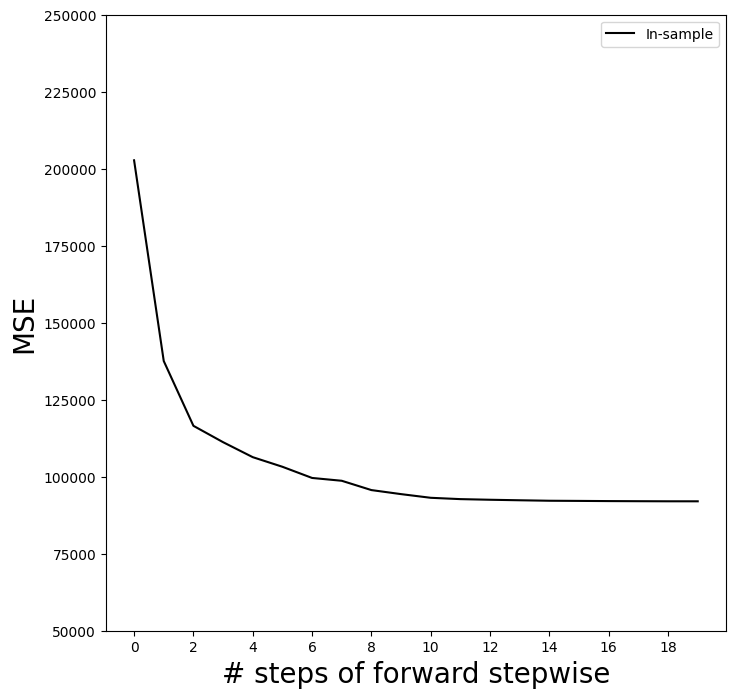

In [17]:
mse_fig , ax = subplots(figsize=(8,8))
insample_mse = ((Yhat_in - Y[:,None])**2).mean(0)
n_steps = insample_mse.shape[0]
ax.plot(np.arange(n_steps),
        insample_mse ,
        'k', # color black
        label='In-sample'
       )
ax.set_ylabel('MSE',
              fontsize=20
             )
ax.set_xlabel('# steps of forward stepwise',
              fontsize=20
             )
ax.set_xticks(np.arange(n_steps)[::2])
ax.legend()
ax.set_ylim ([50000 ,250000]);

Notice the expression `None` in `Y[:,None]` above. This adds an axis (dimension) to the one-dimensional array `Y`, which allows it to be recycled when subtracted from the two-dimensional `Yhat_in`.<br> We are now ready to use cross validation to estimate test error along the model path. We must use *only the training observations* to perform all aspects of model-fitting — including variable selection. Therefore, the determination of which model of a given size is best must be made using *only the training observations* in each training fold. This point is subtle but important. If the full data set is used to select the best subset at each step, then the validation set errors and cross-validation errors that we obtain will not be accurate estimates of the test error.<br> We now compute the cross-validated predicted values using 5-fold crossvalidation.

In [18]:
K = 5
kfold = skm.KFold(K,
                  random_state=0,
                  shuffle=True
                 )
Yhat_cv = skm.cross_val_predict(full_path ,
                                Hitters ,
                                Y,
                                cv=kfold
                               )
Yhat_cv.shape

(263, 20)

The prediction matrix `Yhat_cv` is the same shape as `Yhat_in`; the difference is that the predictions in each row, corresponding to a particular sample index, were made from models fit on a training fold that did not include that row.<br> At each model along the path, we compute the MSE in each of the crossvalidation folds. These we will average to get the mean MSE, and can also use the individual values to compute a crude estimate of the standard error of the mean (The estimate is crude because the five error estimates are based on overlapping
training sets, and hence are not independent). Hence we must know the test indices for each cross-validation split. This can be found by using the `split()` method of `kfold`. Because we fixed the random state above, whenever we split any array with the same number of rows as Y we recover the same training and test indices, though we simply ignore the training indices below.

In [19]:
cv_mse = []
for train_idx , test_idx in kfold.split(Y):
    errors = (Yhat_cv[test_idx] - Y[test_idx ,None])**2
    cv_mse.append(errors.mean(0)) # column means
cv_mse = np.array(cv_mse).T
cv_mse.shape

(20, 5)

We now add the cross-validation error estimates to our MSE plot. We include the mean error across the five folds, and the estimate of the standard error of the mean.

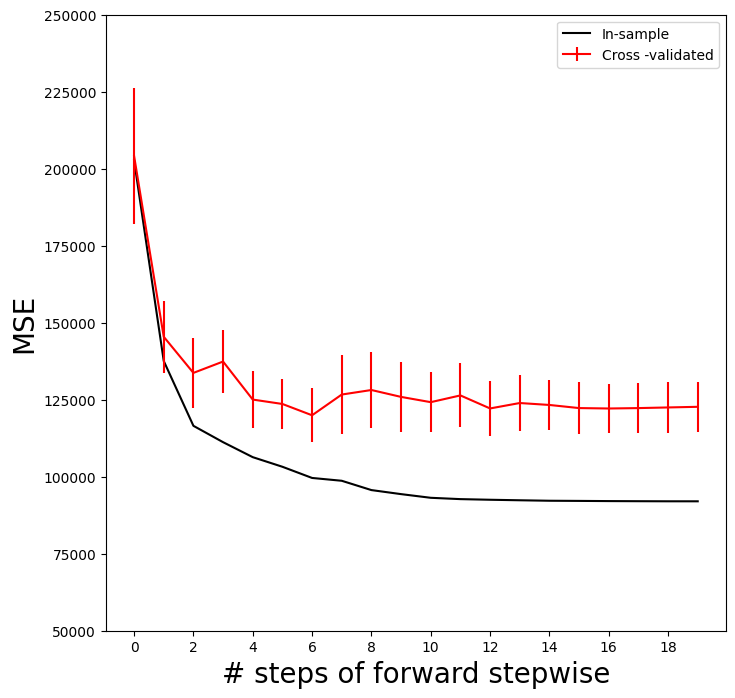

In [20]:
ax.errorbar(np.arange(n_steps),
            cv_mse.mean(1),
            cv_mse.std(1) / np.sqrt(K),
            label='Cross -validated',
            c='r') # color red
ax.set_ylim ([50000 ,250000])
ax.legend()
mse_fig

To repeat the above using the validation set approach, we simply change our `cv` argument to a validation set: one random split of the data into a test and training. We choose a test size of 20%, similar to the size of each test set in 5-fold cross-validation.

In [21]:
validation = skm.ShuffleSplit(n_splits=1,
                              test_size=0.2,
                              random_state=0
                             )
for train_idx , test_idx in validation.split(Y):
    full_path.fit(Hitters.iloc[train_idx],
                  Y[train_idx]
                 )
    Yhat_val = full_path.predict(Hitters.iloc[test_idx])
    errors = (Yhat_val - Y[test_idx ,None])**2
    validation_mse = errors.mean(0)

As for the in-sample MSE case, the validation set approach does not provide standard errors.

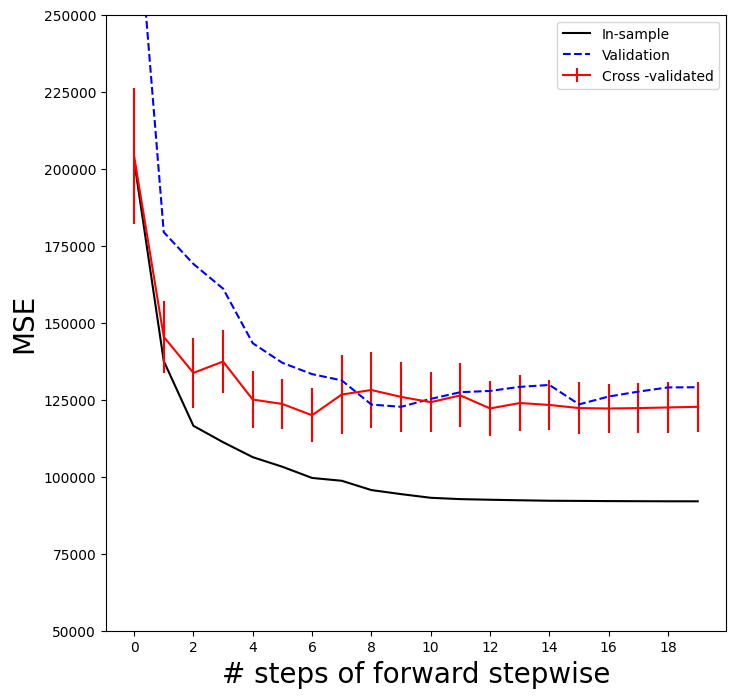

In [22]:
ax.plot(np.arange(n_steps),
        validation_mse ,
        'b--', # color blue, broken line
        label='Validation'
       )
ax.set_xticks(np.arange(n_steps)[::2])
ax.set_ylim ([50000 ,250000])
ax.legend()
mse_fig

## Best Subset Selection
Forward stepwise is a *greedy* selection procedure; at each step it augments the current set by including one additional variable. We now apply best subset selection to the `Hitters` data, which for every subset size, searches for the best set of predictors.<br> We will use a package called `l0bnb` to perform best subset selection. Instead of constraining the subset to be a given size, this package produces a path of solutions using the subset size as a penalty rather than a constraint. Although the distinction is subtle, the difference comes when we cross-validate.

In [23]:
D = design.fit_transform(Hitters)
D = D.drop('intercept', axis=1)
X = np.asarray(D)

Here we excluded the first column corresponding to the intercept, as `l0bnb` will fit the intercept separately. We can find a path using the `fit_path()` function.

In [28]:
path = fit_path(X,
                Y,
                max_nonzeros=X.shape[1])

Preprocessing Data.
BnB Started.
Iteration: 1. Number of non-zeros:  1
Iteration: 2. Number of non-zeros:  2
Iteration: 3. Number of non-zeros:  2
Iteration: 4. Number of non-zeros:  2
Iteration: 5. Number of non-zeros:  3
Iteration: 6. Number of non-zeros:  3
Iteration: 7. Number of non-zeros:  4
Iteration: 8. Number of non-zeros:  9
Iteration: 9. Number of non-zeros:  9
Iteration: 10. Number of non-zeros:  9
Iteration: 11. Number of non-zeros:  9
Iteration: 12. Number of non-zeros:  9
Iteration: 13. Number of non-zeros:  9
Iteration: 14. Number of non-zeros:  9
Iteration: 15. Number of non-zeros:  9
Iteration: 16. Number of non-zeros:  9
Iteration: 17. Number of non-zeros:  9
Iteration: 18. Number of non-zeros:  17
Iteration: 19. Number of non-zeros:  19


The function `fit_path()` returns a list whose values include the fitted coefficients as `B`, an intercept as `B0`, as well as a few other attributes related to the particular path algorithm used. Such details are beyond the scope of this book.

In [29]:
path[3]

{'B': array([0.        , 3.25484367, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.67775265, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 'B0': np.float64(-38.98216739555505),
 'lambda_0': np.float64(0.011416248027450187),
 'M': np.float64(0.5829861733382012),
 'Time_exceeded': False}

In the example above, we see that at the fourth step in the path, we have two nonzero coefficients in `B`, corresponding to the value 0.114 for the penalty parameter `lambda_0`. We could make predictions using this sequence of fits on a validation set as a function of `lambda_0`, or with more work using cross-validation.

## Ridge Regression and the Lasso
We will use the `sklearn.linear_model` package (for which we use `skl` as shorthand below) to fit *ridge* and *lasso* regularized linear models on the `Hitters` data. We start with the model matrix `X` (without an intercept) that we computed in the previous section on best subset regression.

### Ridge Regression
We will use the function `skl.ElasticNet()` to fit both *ridge* and *lasso*. To fit a *path* of ridge regressions models, `we use skl.ElasticNet.path()`, which  can fit both *ridge* and *lasso*, as well as a *hybrid mixture*; ridge regression corresponds to `l1_ratio=0`. It is good practice to standardize the columns of `X` in these applications, if the variables are measured in different units. Since `skl.ElasticNet()` does no normalization, we have to take care of that ourselves. Since we standardize first, in order to find coefficient estimates on the original scale, we must unstandardize the coefficient estimates. The parameter  λ in (6.5) and (6.7) is called *alphas* in `sklearn`. In order to be consistent with the rest of this chapter, we use lambdas rather than alphas
in what follows(At the time of publication, ridge fits like the one in code chunk `[30]` issue unwarranted
convergence warning messages; we expect these to disappear as this package matures).

In [30]:
Xs = X - X.mean(0)[None ,:]
X_scale = X.std(0)
Xs = Xs / X_scale[None ,:]
lambdas = 10**np.linspace(8, -2, 100) / Y.std()
soln_array = skl.ElasticNet.path(Xs,
                                 Y,
                                 l1_ratio=0.,
                                 alphas=lambdas)[1]
soln_array.shape

C:\Users\vijay\project\ISLP\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\vijay\project\ISLP\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64428165.36474803, tolerance: 12885.7065737425
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\vijay\project\ISLP\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\vijay\project\ISLP\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_des

(19, 100)

Here we extract the array of coefficients corresponding to the solutions along the regularization path. By default the `skl.ElasticNet.path` method fits a path along an automatically selected range of  λ values, except for the case when `l1_ratio=0.`, which results in ridge regression (as is the case here) (The reason is rather technical; for all models except ridge, we can find the smallest value of λ for which all coefficients are zero. For ridge this value is ∞). So here we have chosen to implement the function over a grid of values ranging from λ = 10⁸ to λ = 10⁻² scaled by the standard deviation of *y*, essentially covering the full range of scenarios from the null model containing only the intercept, to the least squares fit.<br> Associated with each value of λ is a vector of ridge regression coefficients, that can be accessed by a column of `soln_array`. In this case, `soln_array` is a 19 × 100 matrix, with 19 rows (one for each predictor) and 100 columns (one for each value of !).<br> We transpose this matrix and turn it into a data frame to facilitate viewing and plotting.

In [31]:
soln_path = pd.DataFrame(soln_array.T,
                         columns=D.columns ,
                         index=-np.log(lambdas)
                        )
soln_path.index.name = 'negative log(lambda)'
soln_path

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League[N],Division[W],PutOuts,Assists,Errors,NewLeague[N]
negative log(lambda),,,,,,,,,,,,,,,,,,,
-12.310855,0.000800,0.000889,0.000695,0.000851,0.000911,0.000900,0.000812,0.001067,0.001113,0.001064,0.001141,0.001149,0.000993,-0.000029,-0.000390,0.000609,0.000052,-0.000011,-0.000006
-12.078271,0.001010,0.001122,0.000878,0.001074,0.001150,0.001135,0.001025,0.001346,0.001404,0.001343,0.001439,0.001450,0.001253,-0.000037,-0.000492,0.000769,0.000065,-0.000014,-0.000007
-11.845686,0.001274,0.001416,0.001107,0.001355,0.001451,0.001433,0.001293,0.001698,0.001772,0.001694,0.001816,0.001830,0.001581,-0.000046,-0.000621,0.000970,0.000082,-0.000017,-0.000009
-11.613102,0.001608,0.001787,0.001397,0.001710,0.001831,0.001808,0.001632,0.002143,0.002236,0.002138,0.002292,0.002309,0.001995,-0.000058,-0.000784,0.001224,0.000104,-0.000022,-0.000012
-11.380518,0.002029,0.002255,0.001763,0.002158,0.002310,0.002281,0.002059,0.002704,0.002821,0.002698,0.002892,0.002914,0.002517,-0.000073,-0.000990,0.001544,0.000131,-0.000028,-0.000015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.784658,-290.823989,336.929968,37.322686,-59.748520,-26.507086,134.855915,-17.216195,-387.775826,89.573601,-12.273926,476.079273,257.271255,-213.124780,31.258215,-58.457857,78.761266,53.622113,-22.208456,-12.402891
10.017243,-290.879272,337.113713,37.431373,-59.916820,-26.606957,134.900549,-17.108041,-388.458404,89.000707,-12.661459,477.031349,257.966790,-213.280891,31.256434,-58.448850,78.761240,53.645147,-22.198802,-12.391969
10.249827,-290.923382,337.260446,37.518064,-60.051166,-26.686604,134.936136,-17.022194,-388.997470,88.537380,-12.971603,477.791860,258.523025,-213.405740,31.254958,-58.441682,78.761230,53.663357,-22.191071,-12.383205


We plot the paths to get a sense of how the coefficients vary with λ. To control the location of the legend we first set `legend` to `False` in the plot method, adding it afterward with the `legend()` method of `ax`.

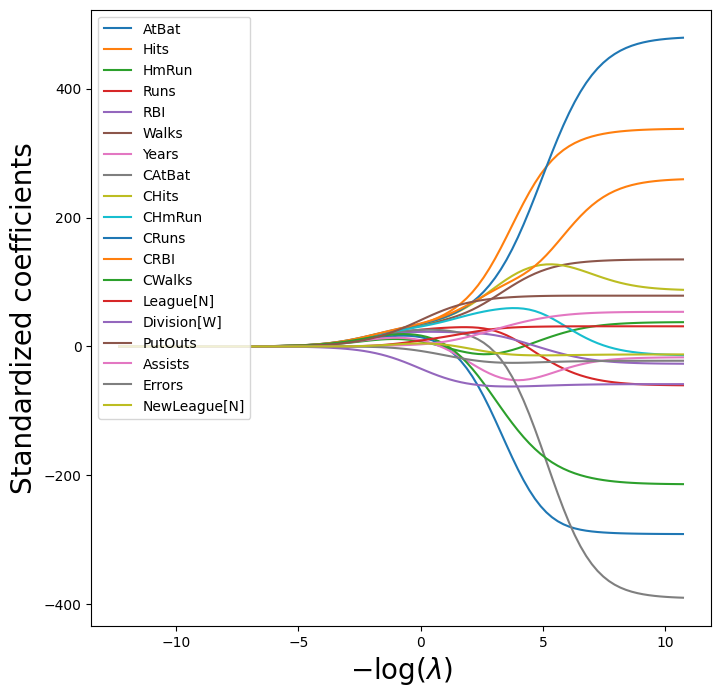

In [32]:
path_fig , ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20)
ax.legend(loc='upper left');

(We have used `latex` formatting in the horizontal label, in order to format the Greek λ appropriately.) We expect the coefficient estimates to be much smaller, in terms of 𝓁₂ norm, when a large value of λ is used, as compared to when a small value of λ is used. (Recall that the *𝓁₂ norm* is the square root of the sum of squared coefficient values.) We display the coefficients at the 40th step, where λ is 25.535.

In [33]:
beta_hat = soln_path.loc[soln_path.index[39]]
lambdas[39], beta_hat

(np.float64(25.53538897200662),
 AtBat           5.433750
 Hits            6.223582
 HmRun           4.585498
 Runs            5.880855
 RBI             6.195921
 Walks           6.277975
 Years           5.299767
 CAtBat          7.147501
 CHits           7.539495
 CHmRun          7.182344
 CRuns           7.728649
 CRBI            7.790702
 CWalks          6.592901
 League[N]       0.042445
 Division[W]    -3.107159
 PutOuts         4.605263
 Assists         0.378371
 Errors         -0.135196
 NewLeague[N]    0.150323
 Name: -3.240065292879872, dtype: float64)

Let’s compute the *𝓁₂ norm* of the standardized coefficients.

In [34]:
np.linalg.norm(beta_hat)

np.float64(24.170617201443775)

In contrast, here is the 𝓁₂ norm when λ  is 2.44e-01. Note the much larger 𝓁₂ norm of the coefficients associated with this smaller value of λ.

In [35]:
beta_hat = soln_path.loc[soln_path.index[59]]
lambdas[59], np.linalg.norm(beta_hat)

(np.float64(0.24374766133488554), np.float64(160.42371017725813))

Above we normalized `X` upfront, and fit the ridge model using `Xs`. The `Pipeline()` object in `sklearn` provides a clear way to separate feature normalization from the fitting of the ridge model itself.

In [36]:
ridge = skl.ElasticNet(alpha=lambdas[59], l1_ratio=0)
scaler = StandardScaler(with_mean=True , with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('ridge', ridge)])
pipe.fit(X, Y)

C:\Users\vijay\project\ISLP\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.446e+07, tolerance: 5.332e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge',
                 ElasticNet(alpha=np.float64(0.24374766133488554),
                            l1_ratio=0))])

We show that it gives the same 𝓁₂ norm as in our previous fit on the standardized data.

In [37]:
np.linalg.norm(ridge.coef_)

np.float64(160.4237101772592)

Notice that the operation `pipe.fit(X, Y)` above has changed the `ridge` object, and in particular has added attributes such as `coef_` that were not there before.

### Estimating Test Error of Ridge Regression
Choosing an a *priori* value of λ for ridge regression is difficult if not impossible. We will want to use the validation method or cross-validation to select the tuning parameter. The reader may not be surprised that the `Pipeline()` approach can be used in `skm.cross_validate()` with either a validation method (i.e. `validation`) or k-fold cross-validation.<br>We fix the random state of the splitter so that the results obtained will be reproducible.

In [38]:
validation = skm.ShuffleSplit(n_splits=1,
                              test_size=0.5,
                              random_state=0
                             )
ridge.alpha = 0.01
results = skm.cross_validate(ridge ,
                             X,
                             Y,
                             scoring='neg_mean_squared_error',
                             cv=validation
                            )
-results['test_score']

C:\Users\vijay\project\ISLP\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.486e+06, tolerance: 2.272e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


array([134214.00419204])

The test MSE is 1.342e+05. Note that if we had instead simply fit a model with just an intercept, we would have predicted each test observation using the mean of the training observations. We can get the same result by fitting a ridge regression model with a *very large* value of λ. Note that `1e10` means 10¹⁰.

In [39]:
ridge.alpha = 1e10
results = skm.cross_validate(ridge ,
                             X,
                             Y,
                             scoring='neg_mean_squared_error',
                             cv=validation
                            )
-results['test_score']

C:\Users\vijay\project\ISLP\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+07, tolerance: 2.272e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


array([231788.32155285])

Obviously choosing λ = 0.01 is arbitrary, so we will use cross-validation or the validation-set approach to choose the tuning parameter λ. The object `GridSearchCV()` allows exhaustive grid search to choose such a parameter. <br>We first use the validation set method to choose λ.

In [40]:
param_grid = {'ridge__alpha': lambdas}
grid = skm.GridSearchCV(pipe ,
                        param_grid ,
                        cv=validation ,
                        scoring='neg_mean_squared_error'
                       )
grid.fit(X, Y)
grid.best_params_['ridge__alpha']
grid.best_estimator_

C:\Users\vijay\project\ISLP\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+07, tolerance: 2.272e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\vijay\project\ISLP\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+07, tolerance: 2.272e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemente

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge',
                 ElasticNet(alpha=np.float64(0.005899006046740856),
                            l1_ratio=0))])

Alternatively, we can use 5-fold cross-validation:

In [41]:
grid = skm.GridSearchCV(pipe ,
                        param_grid ,
                        cv=kfold ,
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)
grid.best_params_['ridge__alpha']
grid.best_estimator_

C:\Users\vijay\project\ISLP\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.880e+07, tolerance: 3.759e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\vijay\project\ISLP\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.101e+07, tolerance: 4.201e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemente

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge',
                 ElasticNet(alpha=np.float64(0.01185247763144249),
                            l1_ratio=0))])

Recall we set up the kfold object for 5-fold cross-validation on cell `[18]`. We now plot the cross-validated MSE as a function of `−log(λ)`, which has shrinkage decreasing from left to right.

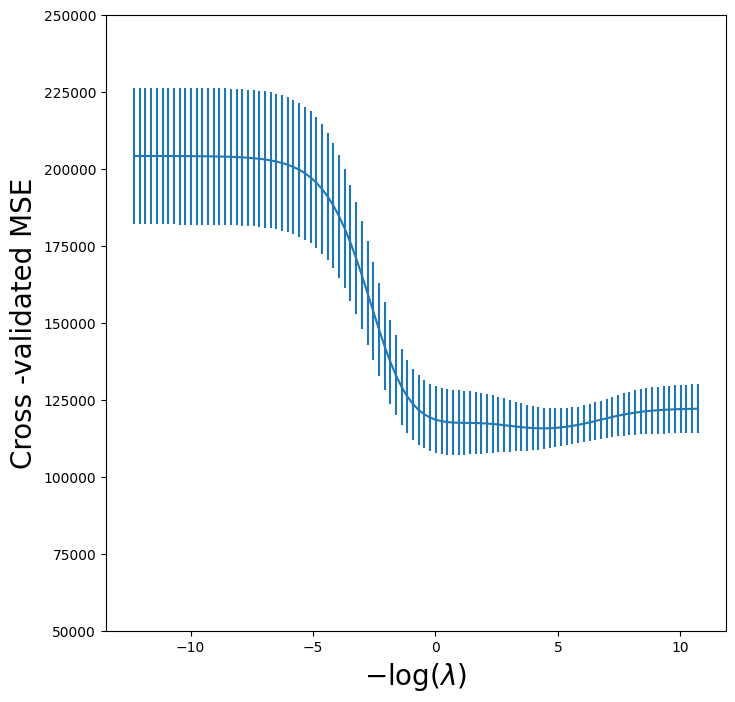

In [42]:
ridge_fig , ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            -grid.cv_results_['mean_test_score'],
            yerr=grid.cv_results_['std_test_score'] / np.sqrt(K)
           )
ax.set_ylim ([50000 ,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross -validated MSE', fontsize=20);

One can cross-validate different metrics to choose a parameter. The default metric for `skl.ElasticNet()` is test R². Let’s compare R² to MSE for cross-validation here.

In [43]:
grid_r2 = skm.GridSearchCV(pipe ,
                           param_grid ,
                           cv=kfold)
grid_r2.fit(X, Y)

C:\Users\vijay\project\ISLP\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.880e+07, tolerance: 3.759e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\vijay\project\ISLP\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.101e+07, tolerance: 4.201e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemente

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge',
                                        ElasticNet(alpha=10000000000.0,
                                                   l1_ratio=0))]),
             param_grid={'ridge__alpha': array([2.22093791e+05, 1.76005531e+05, 1.39481373e+05, 1.10536603e+05,
       8.75983676e+04, 6.94202082e+04, 5.50143278e+04, 4.35979140e+04,
       3.45506012e+04, 2.73807606...
       4.67486141e-03, 3.70474772e-03, 2.93594921e-03, 2.32668954e-03,
       1.84386167e-03, 1.46122884e-03, 1.15799887e-03, 9.17694298e-04,
       7.27257037e-04, 5.76338765e-04, 4.56738615e-04, 3.61957541e-04,
       2.86845161e-04, 2.27319885e-04, 1.80147121e-04, 1.42763513e-04,
       1.13137642e-04, 8.96596467e-05, 7.10537367e-05, 5.63088712e-05,
       4.46238174e-05, 3.53636122e-05, 2.80250579e-05, 2.22093791e-05])})

Finally, let’s plot the results for cross-validated R²

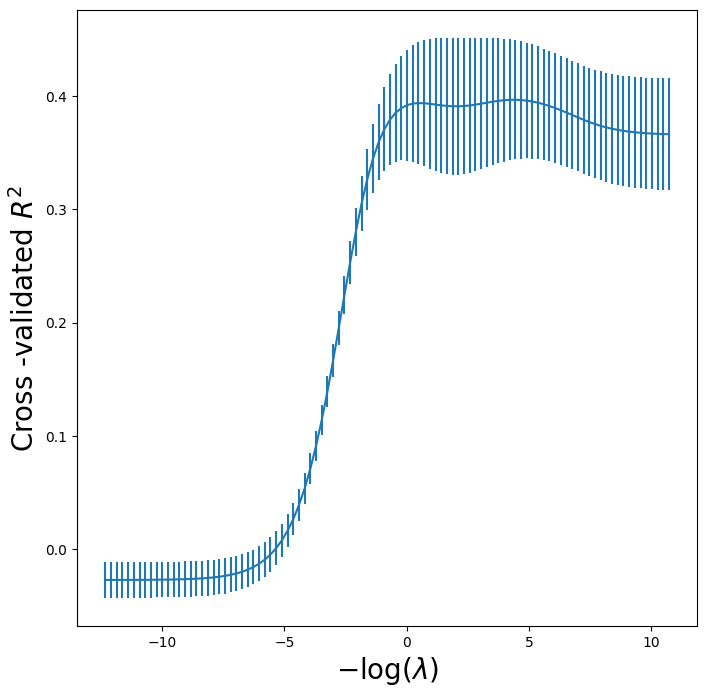

In [44]:
r2_fig , ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            grid_r2.cv_results_['mean_test_score'],
            yerr=grid_r2.cv_results_['std_test_score'] / np.sqrt(K)
           )
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross -validated $R^2$', fontsize=20);

### Fast Cross-Validation for Solution Paths
The ridge, lasso, and elastic net can be efficiently fit along a sequence of λ values, creating what is known as a *solution path* or *regularization path*. Hence there is specialized code to fit such paths, and to choose a suitable value of λ using cross-validation. Even with identical splits the results will not agree *exactly* with our `grid` above because the standardization of each feature in grid is carried out on each fold, while in `pipeCV` below it is carried out only once. Nevertheless, the results are similar as the normalization is relatively stable across folds.

In [45]:
ridgeCV = skl.ElasticNetCV(alphas=lambdas ,
                           l1_ratio=0,
                           cv=kfold
                          )
pipeCV = Pipeline(steps=[('scaler', scaler),('ridge', ridgeCV)]
                 )
pipeCV.fit(X, Y)

C:\Users\vijay\project\ISLP\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\vijay\project\ISLP\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18795326.355502337, tolerance: 3759.1091668691934
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\vijay\project\ISLP\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\vijay\project\ISLP\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge',
                 ElasticNetCV(alphas=array([2.22093791e+05, 1.76005531e+05, 1.39481373e+05, 1.10536603e+05,
       8.75983676e+04, 6.94202082e+04, 5.50143278e+04, 4.35979140e+04,
       3.45506012e+04, 2.73807606e+04, 2.16987845e+04, 1.71959156e+04,
       1.36274691e+04, 1.07995362e+04, 8.55844774e+03, 6.78242347e+03,
       5.37495461e+03, 4.25955961e+03,...
       1.84386167e-03, 1.46122884e-03, 1.15799887e-03, 9.17694298e-04,
       7.27257037e-04, 5.76338765e-04, 4.56738615e-04, 3.61957541e-04,
       2.86845161e-04, 2.27319885e-04, 1.80147121e-04, 1.42763513e-04,
       1.13137642e-04, 8.96596467e-05, 7.10537367e-05, 5.63088712e-05,
       4.46238174e-05, 3.53636122e-05, 2.80250579e-05, 2.22093791e-05]),
                              cv=KFold(n_splits=5, random_state=0, shuffle=True),
                              l1_ratio=0))])

Let’s produce a plot again of the cross-validation error to see that it is similar to using `skm.GridSearchCV`

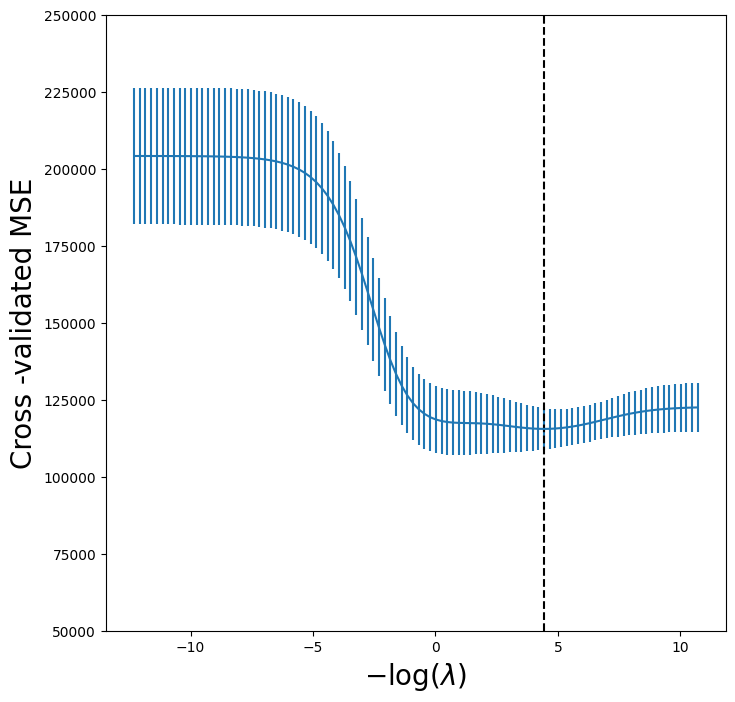

In [46]:
tuned_ridge = pipeCV.named_steps['ridge']
ridgeCV_fig , ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            tuned_ridge.mse_path_.mean(1),
            yerr=tuned_ridge.mse_path_.std(1) / np.sqrt(K)
           )
ax.axvline(-np.log(tuned_ridge.alpha_), c='k', ls='--')
ax.set_ylim ([50000 ,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross -validated MSE', fontsize=20);

We see that the value of λ that results in the smallest cross-validation error is 1.19e-02, available as the value `tuned_ridge.alpha_`. What is the test MSE associated with this value of λ?

In [47]:
np.min(tuned_ridge.mse_path_.mean(1))

np.float64(115526.70630987766)

This represents a further improvement over the test MSE that we got using  λ = 4. Finally, `tuned_ridge.coef_` has the coefficients fit on the entire data set at this value of  λ.

In [48]:
tuned_ridge.coef_

array([-222.80877051,  238.77246614,    3.21103754,   -2.93050845,
          3.64888723,  108.90953869,  -50.81896152, -105.15731984,
        122.00714801,   57.1859509 ,  210.35170348,  118.05683748,
       -150.21959435,   30.36634231,  -61.62459095,   77.73832472,
         40.07350744,  -25.02151514,  -13.68429544])

As expected, none of the coefficients are zero — *ridge regression* does not perform variable selection

### Evaluating Test Error of Cross-Validated Ridge
Choosing λ using cross-validation provides a single regression estimator, similar to fitting a linear regression model as we saw in Chapter 3. It is therefore reasonable to estimate what its test error is. We run into a problem here in that cross-validation will have *touched* all of its data in choosing λ, hence we have no further data to estimate test error. A compromise is to do an initial split of the data into two disjoint sets: a training set and a test set. We then fit a cross-validation tuned ridge regression on the training set, and evaluate its performance on the test set. We might call this cross-validation nested within the validation set approach. A priori there is no reason to use half of the data for each of the two sets in validation. Below, we use 75% for training and 25% for test, with the estimator being ridge regression tuned using 5-fold cross-validation. This can be achieved in code as follows:

In [49]:
outer_valid = skm.ShuffleSplit(n_splits=1,
                               test_size=0.25,
                               random_state=1
                              )
inner_cv = skm.KFold(n_splits=5,
                     shuffle=True ,
                     random_state=2
                    )
ridgeCV = skl.ElasticNetCV(alphas=lambdas ,
                           l1_ratio=0,
                           cv=inner_cv
                          )
pipeCV = Pipeline(steps=[('scaler', scaler),('ridge', ridgeCV)]
                 );

In [50]:
results = skm.cross_validate(pipeCV ,
                             X,
                             Y,
                             cv=outer_valid ,
                             scoring='neg_mean_squared_error')
-results['test_score']

C:\Users\vijay\project\ISLP\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\vijay\project\ISLP\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16002961.89304734, tolerance: 3200.6325551004934
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\vijay\project\ISLP\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\vijay\project\ISLP\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_d

array([132393.84003227])

## The Lasso
We saw that *ridge regression* with a wise choice of λ can outperform least squares as well as the null model on the `Hitters` data set. We now ask whether the lasso can yield either a more accurate or a more interpretable model than ridge regression. In order to fit a lasso model, we once again use the `ElasticNetCV()` function; however, this time we use the argument `l1_ratio=1`. Other than that change, we proceed just as we did in fitting a ridge model.

In [51]:
lassoCV = skl.ElasticNetCV(n_alphas=100,
                           l1_ratio=1,
                           cv=kfold
                          )
pipeCV = Pipeline(steps=[('scaler', scaler),('lasso', lassoCV)]
                 )
pipeCV.fit(X, Y)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_

np.float64(3.1472370031649866)

In [52]:
lambdas , soln_array = skl.Lasso.path(Xs,
                                      Y,
                                      l1_ratio=1,
                                      n_alphas =100)[:2]
soln_path = pd.DataFrame(soln_array.T,
                         columns=D.columns ,
                         index=-np.log(lambdas))

We can see from the coefficient plot of the standardized coefficients that depending on the choice of tuning parameter, some of the coefficients will be exactly equal to zero.

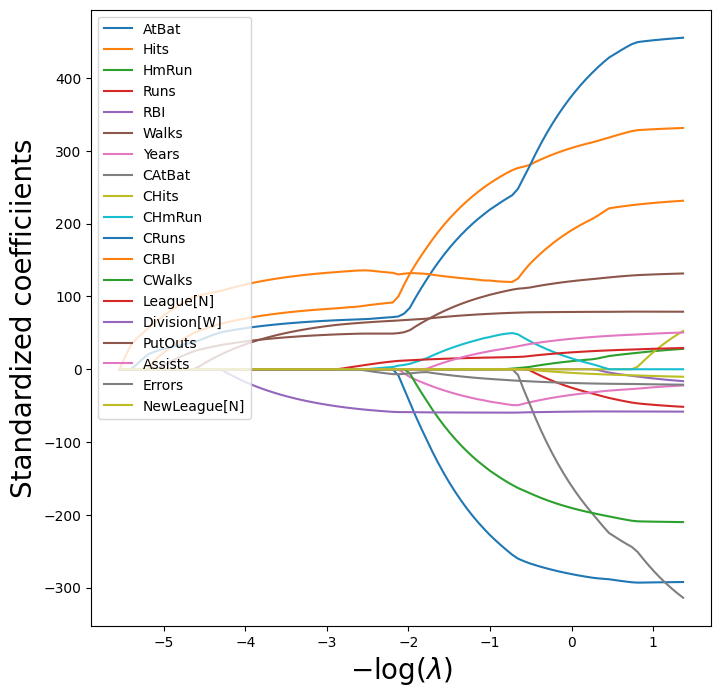

In [53]:
path_fig , ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficiients', fontsize=20);

The smallest cross-validated error is lower than the test set MSE of the null model and of least squares, and very similar to the test MSE of 115526.71 of ridge regression`[47]` with λ chosen by cross-validation

In [54]:
np.min(tuned_lasso.mse_path_.mean(1))

np.float64(114690.731182537)

Let’s again produce a plot of the cross-validation error

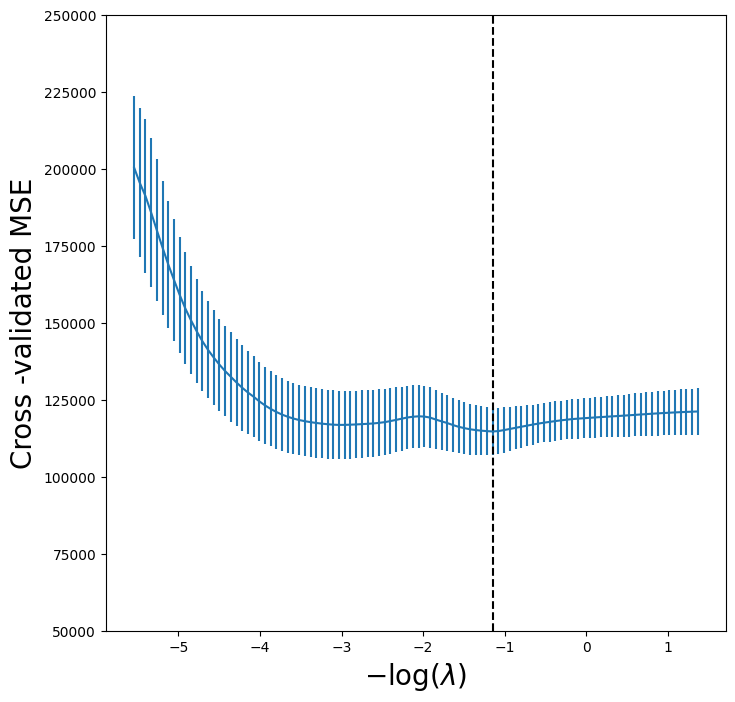

In [55]:
lassoCV_fig , ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
            tuned_lasso.mse_path_.mean(1),
            yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_ylim ([50000 ,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross -validated MSE', fontsize=20);

However, the lasso has a substantial advantage over ridge regression in that the resulting coefficient estimates are sparse. Here we see that 6 of the 19 coefficient estimates are exactly zero. So the lasso model with λ  chosen by cross-validation contains only 13 variables.

In [56]:
tuned_lasso.coef_

array([-210.01008773,  243.4550306 ,    0.        ,    0.        ,
          0.        ,   97.69397357,  -41.52283116,   -0.        ,
          0.        ,   39.62298193,  205.75273856,  124.55456561,
       -126.29986768,   15.70262427,  -59.50157967,   75.24590036,
         21.62698014,  -12.04423675,   -0.        ])

As in ridge regression, we could evaluate the test error of cross-validated lasso by first splitting into test and training sets and internally running cross-validation on the training set. We leave this as an exercise.

## PCR and PLS Regression

### Principal Components Regression (PCR)
***Principal components regression (PCR)*** can be performed using `PCA()` from the `sklearn.decomposition` module. We now apply PCR to the `Hitters` data, in order to predict `Salary`. Again, ensure that the missing values have been removed from the data, as described in `[4]` We use `LinearRegression()` to fit the regression model here. Note that it fits an intercept by default, unlike the `OLS()` function seen earlier in `[4]`.

In [57]:
pca = PCA(n_components=2)
linreg = skl.LinearRegression()
pipe = Pipeline([('pca', pca),('linreg', linreg)]
               )
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_

array([0.09846131, 0.4758765 ])

When performing PCA, the results vary depending on whether the data has been *standardized* or not. As in the earlier examples, this can be accomplished by including an additional step in the pipeline.

In [58]:
pipe = Pipeline([('scaler', scaler),
                 ('pca', pca),
                 ('linreg', linreg)]
               )
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_

array([106.36859204,  21.60350456])

We can of course use CV to choose the number of components, by using `skm.GridSearchCV`, in this case fixing the parameters to vary the `n_components`.

In [59]:
param_grid = {'pca__n_components': range(1, 20)}
grid = skm.GridSearchCV(pipe ,
                        param_grid ,
                        cv=kfold ,
                        scoring='neg_mean_squared_error'
                       )
grid.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('linreg', LinearRegression())]),
             param_grid={'pca__n_components': range(1, 20)},
             scoring='neg_mean_squared_error')

Let’s plot the results as we have for other methods

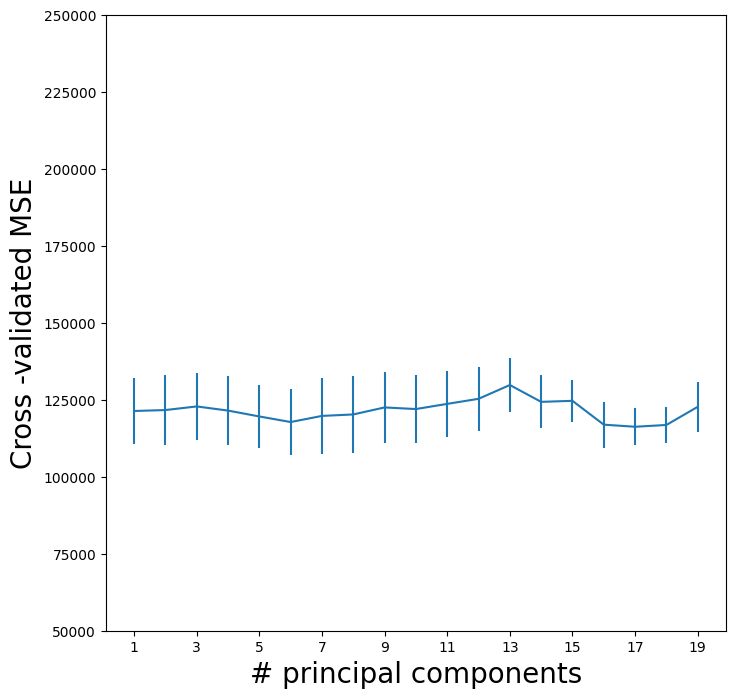

In [61]:
pcr_fig , ax = subplots(figsize=(8,8))
n_comp = param_grid['pca__n_components']
ax.errorbar(n_comp ,
            -grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K)
           )
ax.set_ylabel('Cross -validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp [::2])
ax.set_ylim ([50000 ,250000]);

We see that the smallest cross-validation error occurs when 17 components are used. However, from the plot we also see that the cross-validation error is roughly the same when only one component is included in the model. This suggests that a model that uses just a small number of components might suffice.<br> The CV score is provided for each possible number of components from 1 to 19 inclusive. The `PCA()` method complains if we try to fit an intercept only with `n_components=0` so we also compute the MSE for just the null model with these splits.

In [62]:
Xn = np.zeros((X.shape[0], 1))
cv_null = skm.cross_validate(linreg ,
                             Xn,
                             Y,
                             cv=kfold ,
                             scoring='neg_mean_squared_error'
                            )
-cv_null['test_score'].mean()

np.float64(204139.30692994667)

The `explained_variance_ratio_ attribute` of our PCA object provides the percentage of variance explained in the predictors and in the response using different numbers of components. This concept is discussed in greater detail in 12th Chapter

In [63]:
pipe.named_steps['pca'].explained_variance_ratio_

array([0.3831424 , 0.21841076])

Briefly, we can think of this as the amount of information about the predictors that is captured using M principal components. For example, setting M = 1 only captures 38.31% of the variance, while M = 2 captures an additional 21.84%, for a total of 60.15% of the variance. By M = 6 it increases to 88.63%. Beyond this the increments continue to diminish, until we use all M = p = 19 components, which captures all 100% of the variance.

### Partial Least Squares (PLS)
***Partial least squares*** (PLS) is implemented in the `PLSRegression()` function

In [64]:
pls = PLSRegression(n_components=2,
                    scale=True
                   )
pls.fit(X, Y)

PLSRegression()

As was the case in PCR, we will want to use CV to choose the number of components-

In [65]:
param_grid = {'n_components':range(1, 20)}
grid = skm.GridSearchCV(pls ,
                        param_grid ,
                        cv=kfold ,
                        scoring='neg_mean_squared_error'
                       )
grid.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=PLSRegression(),
             param_grid={'n_components': range(1, 20)},
             scoring='neg_mean_squared_error')

As for our other methods, we plot the MSE.

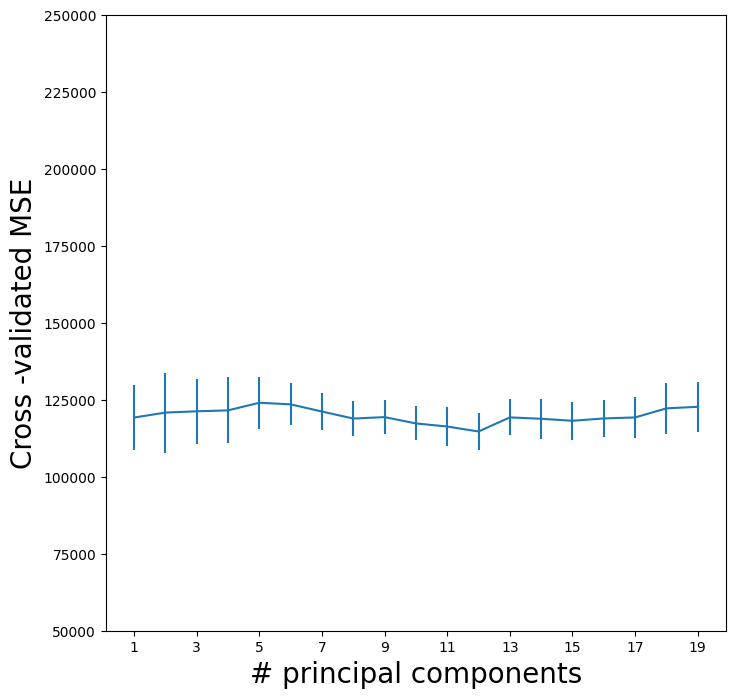

In [66]:
pls_fig , ax = subplots(figsize=(8,8))
n_comp = param_grid['n_components']
ax.errorbar(n_comp ,
            -grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K)
           )

ax.set_ylabel('Cross -validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp [::2])
ax.set_ylim ([50000 ,250000]);

CV error is minimized at 12, though there is little noticable difference between this point and a much lower number like 2 or 3 components.